In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

# def load_dataset():
mndata = MNIST('./')
mndata.gz = True

X_train_raw, labels_train_raw = mndata.load_training()
X_test_raw, labels_test_raw = mndata.load_testing()
X_train_raw = np.array(X_train_raw)/255.0
X_test_raw = np.array(X_test_raw)/255.0
    
idx2 = []
idx7 = []
#sort 
for i in range(len(labels_train_raw)):
    if(labels_train_raw[i] == 2):
        idx2.append(i)
    elif(labels_train_raw[i] == 7):
#         print(i)
        idx2.append(i)
x = X_train_raw[idx2+idx7]
y = np.array(np.array(labels_train_raw)[idx2+idx7],dtype='int')
y[y <3] = -1
y[y >3] = 1
print("original shape = ", X_train_raw.shape)
print("new shape = ", x.shape)
print("num labels = ", len(y))

idx2 = []
idx7 = []
#sort 
for i in range(len(labels_test_raw)):
    if(labels_test_raw[i] == 2):
        idx2.append(i)
    elif(labels_test_raw[i] == 7):
        idx7.append(i)
x_test = X_test_raw[idx2+idx7]
y_test = np.array(np.array(labels_test_raw)[idx2+idx7],dtype='int')
(unique, counts) = np.unique(y_test, return_counts=True)
print(unique)
print(counts)
y_test[y_test <3] = -1
y_test[y_test >3] = 1
print("original shape = ", X_test_raw.shape)
print("new shape = ", x_test.shape)
print("num labels = ", len(y_test))



original shape =  (60000, 784)
new shape =  (12223, 784)
num labels =  12223
[2 7]
[1032 1028]
original shape =  (10000, 784)
new shape =  (2060, 784)
num labels =  2060


In [3]:
def update_weights(w, b, x, y, lam, eta, scale_reg = 1):
    (n,d) = x.shape
    u = 1/(1+np.exp(-y*(b+x@w)))
    dw = np.sum((1-u)*(-x.T*y)/n, axis = 1) + 2*lam*w/scale_reg
    db = np.sum((1-u)*(-y))/n
    w_new = w - eta * dw
    b_new = b - eta * db
    return (w_new, b_new)

def find_J(w,b, x, y, lam):
    (n,d) = x.shape
    return(np.sum(np.log(1+np.exp(-y*(b+x@w))))/n + lam * np.linalg.norm(w)**2)

def find_error(w, b, x, y):
    (n,d) = x.shape
    pred = np.sign(b+x@w)
    num_diff = np.sum((np.abs(pred - y)))/2
#     print(np.abs(pred - y))
    return num_diff/n

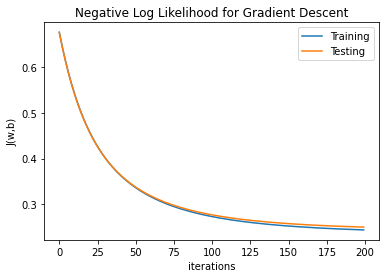

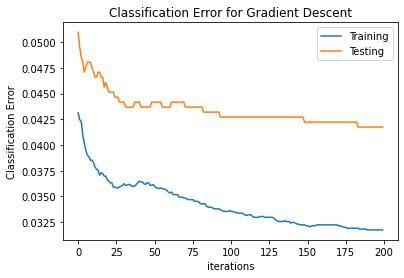

In [5]:
lam = 1e-1
eta = 0.01
(n,d) = x.shape
w = np.zeros(d)
b = 0
J_list = []
J_test_list = []
error_list = []
error_test_list = []

for i in range(200):
    w,b = update_weights(w, b, x, y, lam, eta)
    J_list.append(find_J(w,b, x, y, lam))
    J_test_list.append(find_J(w,b, x_test, y_test, lam))
    error_list.append(find_error(w, b, x, y))
    error_test_list.append(find_error(w, b, x_test, y_test))
    
plt.plot(J_list, label = "Training")
plt.plot(J_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('J(w,b)')
plt.title('Negative Log Likelihood for Gradient Descent')
plt.legend()
plt.show()

plt.plot(error_list, label = "Training")
plt.plot(error_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('Classification Error')
plt.title('Classification Error for Gradient Descent')
plt.legend()
plt.legend()
plt.show()

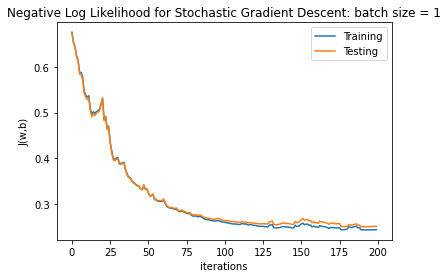

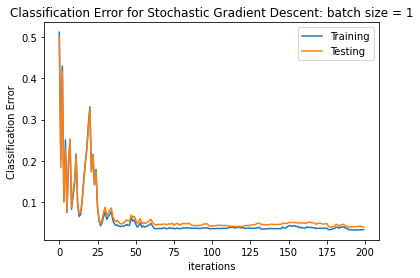

In [6]:
#For stochastic gradient descent
w = np.zeros(d)
b = 0
J_list = []
J_test_list = []
error_list = []
error_test_list = []

batch_size = 1
num_runs = 200#len(y)
for i in range(num_runs):
    idx = np.random.randint(len(y))
    x_this = np.reshape(x[idx], (1,d))
    y_this = y[idx]
    w,b = update_weights(w, b, x_this, y_this, lam, eta, scale_reg = len(y))
    J_list.append(find_J(w,b, x, y, lam))
    J_test_list.append(find_J(w,b, x_test, y_test, lam))
    error_list.append(find_error(w, b, x, y))
    error_test_list.append(find_error(w, b, x_test, y_test))
    
plt.plot(J_list, label = "Training")
plt.plot(J_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('J(w,b)')
plt.title('Negative Log Likelihood for Stochastic Gradient Descent: batch size = 1')
plt.legend()
plt.show()

plt.plot(error_list, label = "Training")
plt.plot(error_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('Classification Error')
plt.title('Classification Error for Stochastic Gradient Descent: batch size = 1')
plt.legend()
plt.show()

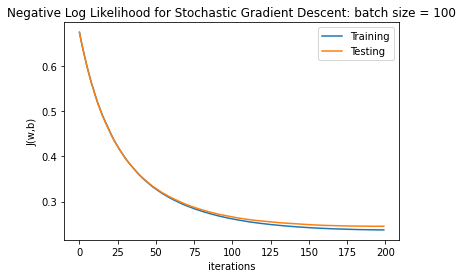

No handles with labels found to put in legend.


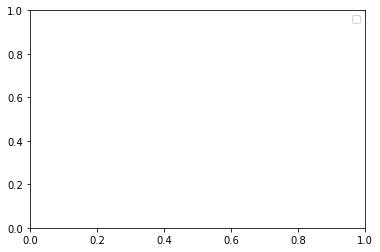

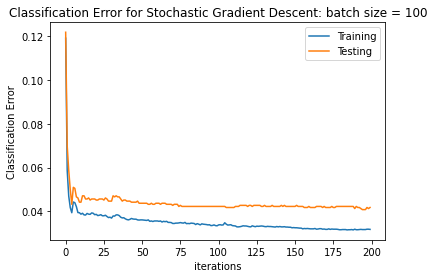

In [7]:
#For stochastic gradient descent
w = np.zeros(d)
b = 0
J_list = []
J_test_list = []
error_list = []
error_test_list = []

batch_size = 1
num_runs = int(len(y)/100)
for i in range(200):
    idx = np.random.randint(len(y), size = 100)
    x_this = x[idx]
    y_this = y[idx]
    w,b = update_weights(w, b, x_this, y_this, lam, eta, scale_reg = len(y)/100)
    J_list.append(find_J(w,b, x, y, lam))
    J_test_list.append(find_J(w,b, x_test, y_test, lam))
    error_list.append(find_error(w, b, x, y))
    error_test_list.append(find_error(w, b, x_test, y_test))
    
plt.plot(J_list, label = "Training")
plt.plot(J_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('J(w,b)')
plt.title('Negative Log Likelihood for Stochastic Gradient Descent: batch size = 100')
plt.legend()
plt.show()

plt.plot(error_list, label = "Training")
plt.plot(error_test_list,  label = "Testing")
plt.xlabel('iterations')
plt.ylabel('Classification Error')
plt.title('Classification Error for Stochastic Gradient Descent: batch size = 100')
plt.legend()
plt.show()